In [49]:
import copy
import random
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt
import numpy as np
from pandas.core.frame import DataFrame
import pandas as pd
import os

In [50]:
env = 118
seed = [555, 777,999]
traintest_two_objective = pd.concat([pd.read_csv('traintest'+str(env)+str(i)+'two.csv') for i in seed],axis = 1)
traintest_long = pd.concat([pd.read_csv('traintest'+str(env)+str(i)+'0.9.csv') for i in seed],axis = 1)
traintest_sac = pd.concat([pd.read_csv('traintestsac'+str(env)+str(i)+'0.9.csv') for i in seed],axis = 1)
traintest_sactootsa = pd.concat([pd.read_csv('traintestsac'+str(env)+str(i)+'tootsa.csv') for i in seed],axis = 1)

traintest_short = pd.concat([pd.read_csv('traintest'+str(env)+str(i)+'0.csv') for i in seed],axis = 1)
traintest_long_two_objective = pd.concat([pd.read_csv('traintest'+str(env)+str(i)+'0.9tc.csv') for i in seed],axis = 1)

traintest_sac_short = pd.concat([pd.read_csv('traintestsac'+str(env)+str(i)+'0.csv') for i in seed],axis = 1)
traintest_sac_two_objective = pd.concat([pd.read_csv('traintestsac'+str(env)+str(i)+'0.9tc.csv') for i in seed],axis = 1)

train_vvo = pd.read_csv('train'+str(env)+'777vvo.csv')

In [51]:
if env==33:
    data = pd.DataFrame(columns=['Algorithm','33-bus-r', '69-bus-r', '118-bus-r','33-bus-pl', '69-bus-pl','118-bus-pl',
                                 '33-bus-v', '69-bus-v', '118-bus-v'])
data.Algorithm = ['MBO','DDPG','SP-DP','TC-DP','SPTC-DP', 'SAC','SP-SAC','TC-SAC','SPTC-SAC']

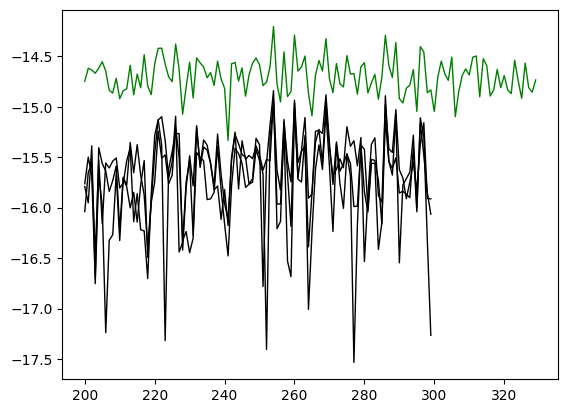

In [52]:
plt.plot(train_vvo.scores[200:],label='two', c='g', linewidth=1)
# plt.plot(traintest_long.scorest[200:],label='two', c='g', linewidth=1)
plt.plot(traintest_two_objective.scorest[200:],label='two', c='k', linewidth=1)
# plt.plot(traintest_sac.scorest[200:],label='SAC', c='m', linewidth=1)
# plt.plot(traintest_sactoot.scorest[200:],label='SACtoot', c='b', linewidth=1)
# plt.plot(traintest_sactootwt.scorest[100:],label='SACtootwt', c='y', linewidth=1)
# plt.plot(traintest_sactootsa.scorest[200:],label='SACtootsa', c='y', linewidth=1)

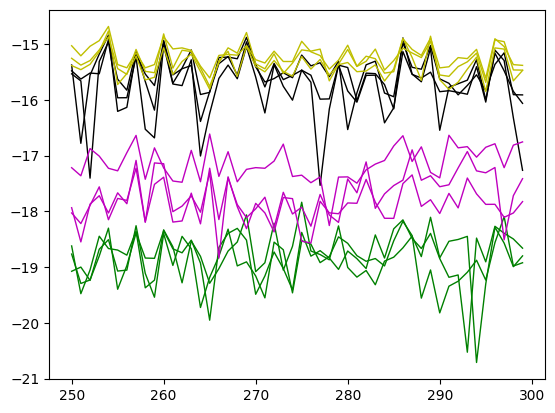

In [53]:
plt.plot(traintest_long.scorest[250:],label='two', c='g', linewidth=1)
plt.plot(traintest_two_objective.scorest[250:],label='two', c='k', linewidth=1)
plt.plot(traintest_sac.grid_loss_sum_st[250:],label='SAC', c='m', linewidth=1)
# plt.plot(traintest_sactoot.grid_loss_sum_st[250:],label='SACtoot', c='b', linewidth=1)
# plt.plot(traintest_sactootwt.grid_loss_sum_st[100:],label='SACtootwt', c='y', linewidth=1)
plt.plot(traintest_sactootsa.grid_loss_sum_st[250:],label='SACtootsa', c='y', linewidth=1)

In [54]:
x = range(len(traintest_two_objective.scorest.mean(1)))
print(x)

range(0, 300)


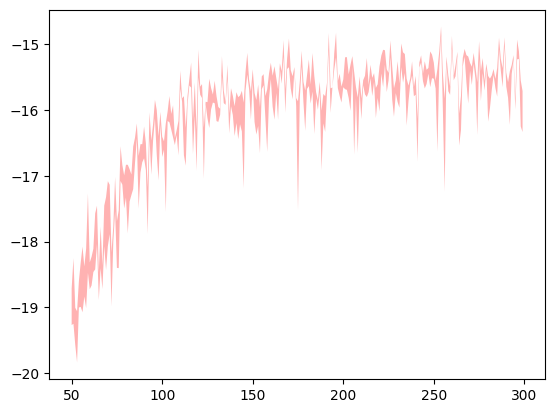

In [55]:
# plt.fill_between(x[:30],traintest_two_objective.scorest.max(1)[:30], traintest_two_objective.scorest.min(1)[:30],
#                  lw=1,ec='b', fc='r', alpha=.3, label='Error bound')
plt.fill_between(x[50:],traintest_sactootsa.scorest.max(1)[50:], traintest_sactootsa.scorest.min(1)[50:],
                 lw=1, fc='r', alpha=.3, label='Error bound')

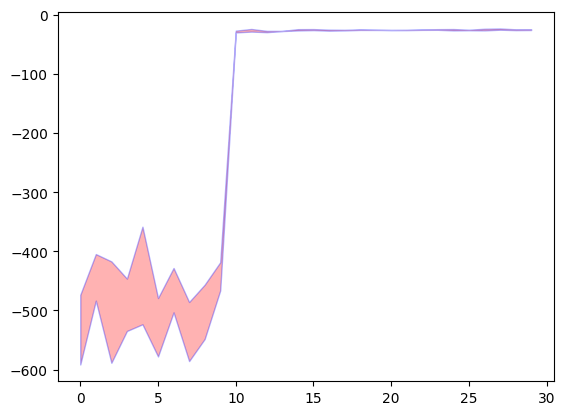

In [56]:
plt.fill_between(x[:30],traintest_sac.scorest.max(1)[:30], traintest_sac.scorest.min(1)[:30],
                 lw=1, ec='b', fc='r', alpha=.3, label='Error bound')

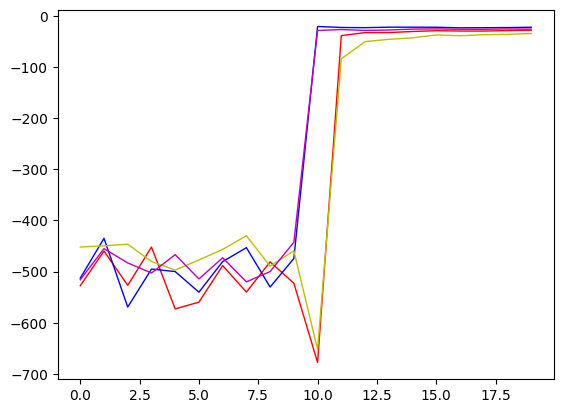

In [57]:
plt.plot(traintest_two_objective.scorest.mean(1)[:20], c='r', linewidth=1)
plt.plot(traintest_sactootsa.scorest.mean(1)[:20], c='b', linewidth=1)
plt.plot(traintest_long.scorest.mean(1)[:20], c='y', linewidth=1)
plt.plot(traintest_sac.scorest.mean(1)[:20], c='m', linewidth=1)

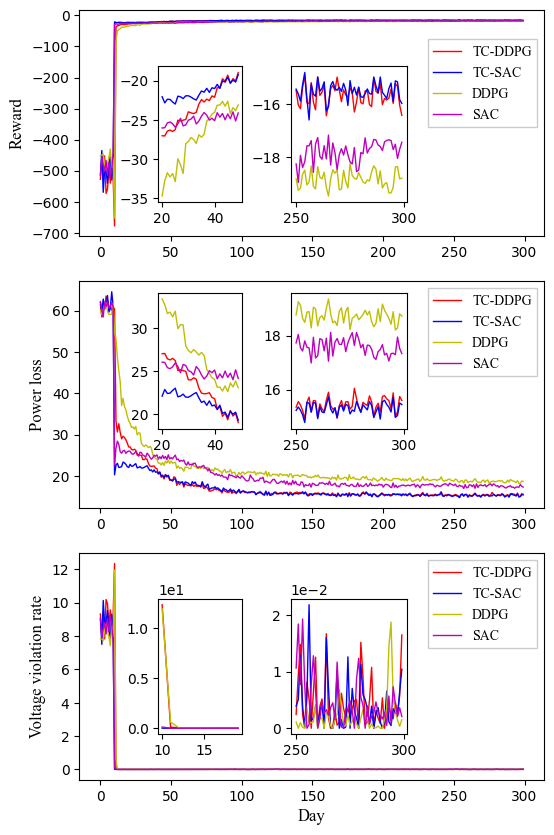

In [58]:
# train_test
x = range(len(traintest_two_objective.scorest.mean(1)))
fig, ax = plt.subplots(3,1,figsize=(6,10))
ax[0].plot(traintest_two_objective.scorest.mean(1),label='TC-DDPG', c='r', linewidth=1)
ax[0].plot(traintest_sactootsa.scorest.mean(1),label='TC-SAC', c='b', linewidth=1)
ax[0].plot(traintest_long.scorest.mean(1),label='DDPG', c='y', linewidth=1)
ax[0].plot(traintest_sac.scorest.mean(1),label='SAC', c='m', linewidth=1)

# ax[0].fill_between(x, traintest_two_objective.scorest.max(1), traintest_two_objective.scorest.min(1),
#                  lw=1, fc='r', alpha=.3)
# ax[0].fill_between(x, traintest_sactootsa.scorest.min(1), traintest_sactootsa.scorest.min(1),
#                  lw=1, fc='b', alpha=.3)
# ax[0].fill_between(x, traintest_long.scorest.min(1), traintest_long.scorest.min(1),
#                  lw=1, fc='y', alpha=.3)
# ax[0].fill_between(x, traintest_sac.scorest.min(1), traintest_sac.scorest.min(1),
#                  lw=1, fc='m', alpha=.3)

# ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('Reward', fontdict={'family' : 'Times New Roman', 'size': 12})

axins = ax[0].inset_axes((0.455, 0.15, 0.25, 0.6))
axins.plot(traintest_two_objective.scorest.mean(1)[250:], c='r', linewidth=1)
axins.plot(traintest_sactootsa.scorest.mean(1)[250:], c='b', linewidth=1)
axins.plot(traintest_long.scorest.mean(1)[250:], c='y', linewidth=1)
axins.plot(traintest_sac.scorest.mean(1)[250:], c='m', linewidth=1)


# axins.fill_between(x[250:], traintest_two_objective.scorest.max(1)[250:], traintest_two_objective.scorest.min(1)[250:],
#                  lw=1, fc='r', alpha=.3)
# axins.fill_between(x[250:], traintest_sactootsa.scorest.min(1)[250:], traintest_sactootsa.scorest.min(1)[250:],
#                  lw=1, fc='b', alpha=.3)
# axins.fill_between(x[250:], traintest_long.scorest.min(1)[250:], traintest_long.scorest.min(1)[250:],
#                  lw=1, fc='y', alpha=.3)
# axins.fill_between(x[250:], traintest_sac.scorest.min(1)[250:], traintest_sac.scorest.min(1)[250:],
#                  lw=1, fc='m', alpha=.3)

axins = ax[0].inset_axes((0.17, 0.15, 0.18, 0.6))
axins.plot(traintest_two_objective.scorest.mean(1)[20:50], c='r', linewidth=1)
axins.plot(traintest_sactootsa.scorest.mean(1)[20:50], c='b', linewidth=1)
axins.plot(traintest_long.scorest.mean(1)[20:50], c='y', linewidth=1)
axins.plot(traintest_sac.scorest.mean(1)[20:50], c='m', linewidth=1)


# axins.fill_between(x[0:20], traintest_two_objective.scorest.max(1)[0:20], traintest_two_objective.scorest.min(1)[0:20],
#                  lw=1, fc='r', alpha=.3)
# axins.fill_between(x[0:20], traintest_sactootsa.scorest.min(1)[0:20], traintest_sactootsa.scorest.min(1)[0:20],
#                  lw=1, fc='b', alpha=.3)
# axins.fill_between(x[0:20], traintest_long.scorest.min(1)[0:20], traintest_long.scorest.min(1)[0:20],
#                  lw=1, fc='y', alpha=.3)
# axins.fill_between(x[0:20], traintest_sac.scorest.min(1)[0:20], traintest_sac.scorest.min(1)[0:20],
#                  lw=1, fc='m', alpha=.3)

ax[0].legend(bbox_to_anchor=(1, 0.9), loc='upper right', fancybox=False, framealpha=1.0,prop={'family' : 'Times New Roman', 'size': 10})



ax[1].plot(-traintest_two_objective.grid_loss_sum_st.mean(1),label='TC-DDPG', c='r', linewidth=1)
ax[1].plot(-traintest_sactootsa.grid_loss_sum_st.mean(1),label='TC-SAC', c='b', linewidth=1)
ax[1].plot(-traintest_long.grid_loss_sum_st.mean(1),label='DDPG', c='y', linewidth=1)
ax[1].plot(-traintest_sac.grid_loss_sum_st.mean(1),label='SAC', c='m', linewidth=1)

# ax[1].set_xlabel('Day', fontsize=12)
ax[1].set_ylabel('Power loss', fontdict={'family' : 'Times New Roman', 'size': 12})

axins = ax[1].inset_axes((0.455, 0.35, 0.25, 0.6))
axins.plot(-traintest_two_objective.grid_loss_sum_st.mean(1)[250:], c='r', linewidth=1)
axins.plot(-traintest_sactootsa.grid_loss_sum_st.mean(1)[250:], c='b', linewidth=1)
axins.plot(-traintest_long.grid_loss_sum_st.mean(1)[250:], c='y', linewidth=1)
axins.plot(-traintest_sac.grid_loss_sum_st.mean(1)[250:], c='m', linewidth=1)


# axins.ticklabel_format(style='sci',scilimits=(0,0),axis='y')

axins = ax[1].inset_axes((0.17, 0.35, 0.18, 0.6))
axins.plot(-traintest_two_objective.grid_loss_sum_st.mean(1)[20:50], c='r', linewidth=1)
axins.plot(-traintest_sactootsa.grid_loss_sum_st.mean(1)[20:50], c='b', linewidth=1)
axins.plot(-traintest_long.grid_loss_sum_st.mean(1)[20:50], c='y', linewidth=1)
axins.plot(-traintest_sac.grid_loss_sum_st.mean(1)[20:50], c='m', linewidth=1)


# axins.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
ax[1].legend(bbox_to_anchor=(1, 1), loc='upper right', fancybox=False, framealpha=1.0,prop={'family' : 'Times New Roman', 'size': 10})

ax[2].plot((traintest_two_objective.violation_sum_M_st.mean(1)+traintest_two_objective.violation_sum_N_st.mean(1)),label='TC-DDPG', c='r', linewidth=1)
ax[2].plot((traintest_sactootsa.violation_sum_M_st.mean(1)+traintest_sactootsa.violation_sum_N_st.mean(1)),label='TC-SAC', c='b', linewidth=1)
ax[2].plot((traintest_long.violation_sum_M_st.mean(1)+traintest_long.violation_sum_N_st.mean(1)),label='DDPG', c='y', linewidth=1)
ax[2].plot((traintest_sac.violation_sum_M_st.mean(1)+traintest_sac.violation_sum_N_st.mean(1)),label='SAC', c='m', linewidth=1)

# ax[2].plot(-traintest_sac.scorest,label='sac', c='y', linewidth=1)
# ax[2].set_xlabel('Day', fontsize=12)
ax[2].set_ylabel('Voltage violation rate', fontdict={'family' : 'Times New Roman', 'size': 12})
axins = ax[2].inset_axes((0.455, 0.2, 0.25, 0.6))
axins.plot((traintest_two_objective.violation_sum_M_st.mean(1)+traintest_two_objective.violation_sum_N_st.mean(1))[250:], c='r', linewidth=1)
axins.plot((traintest_sactootsa.violation_sum_M_st.mean(1)+traintest_sactootsa.violation_sum_N_st.mean(1))[250:], c='b', linewidth=1)
axins.plot((traintest_long.violation_sum_M_st.mean(1)+traintest_long.violation_sum_N_st.mean(1))[250:], c='y', linewidth=1)
axins.plot((traintest_sac.violation_sum_M_st.mean(1)+traintest_sac.violation_sum_N_st.mean(1))[250:], c='m', linewidth=1)

axins.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
axins = ax[2].inset_axes((0.17, 0.2, 0.18, 0.6))
axins.plot((traintest_two_objective.violation_sum_M_st.mean(1)+traintest_two_objective.violation_sum_N_st.mean(1))[10:20], c='r', linewidth=1)
axins.plot((traintest_sactootsa.violation_sum_M_st.mean(1)+traintest_sactootsa.violation_sum_N_st.mean(1))[10:20], c='b', linewidth=1)
axins.plot((traintest_long.violation_sum_M_st.mean(1)+traintest_long.violation_sum_N_st.mean(1))[10:20], c='y', linewidth=1)
axins.plot((traintest_sac.violation_sum_M_st.mean(1)+traintest_sac.violation_sum_N_st.mean(1))[10:20], c='m', linewidth=1)

ax[2].set_xlabel('Day', fontdict={'family' : 'Times New Roman', 'size': 12})
ax[2].legend(bbox_to_anchor=(1, 1), loc='upper right', fancybox=False, framealpha=1.0,prop={'family' : 'Times New Roman', 'size': 10})
axins.ticklabel_format(style='sci',scilimits=(0,0),axis='y')

plt.savefig('DRL_result_'+str(env)+'.pdf', format='pdf', bbox_inches = 'tight')

In [59]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,3),".2f"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
#                     fontsize=12,
                    ha='center', va='bottom')

In [60]:
a1 = traintest_two_objective.scorest.mean(1)[250:].mean()
a2 = traintest_long.scorest.mean(1)[250:].mean()
a3 = traintest_sac.scorest.mean(1)[250:].mean()
a4 = traintest_sactootsa.scorest.mean(1)[250:].mean()
a0 = train_vvo.grid_loss_sum_s[250:].mean()
print(a1,a2,a3,a4,a0)
print((a1-a0)/a0,(a2-a0)/a0,(a3-a0)/a0,(a4-a0)/a0)
print(((a2-a0)/a0)/((a1-a0)/a0),((a3-a0)/a0)/((a4-a0)/a0))

-15.653391920750032 -18.83010501838402 -17.802555402859443 -15.4971928903997 -14.702262684568925
0.06469271135927837 0.2807623848366933 0.21087180829278046 0.05406856229450392
4.339938440320537 3.9000816619497134


In [61]:
b1 = traintest_short.scorest[250:].mean().mean()
b2 = traintest_long_two_objective.scorest[250:].mean().mean()
b3 = traintest_sac_short.scorest[250:].mean().mean()
b4 = traintest_sac_two_objective.scorest[250:].mean().mean()
print(a2,b1,b2,a1)
print(a3,b3,b4,a4)

-18.83010501838402 -19.368096869870115 -16.793926563752933 -15.653391920750032
-17.802555402859443 -16.779184865183268 -16.211994149409573 -15.4971928903997


In [62]:
pd.set_option('display.float_format',lambda  x : '%.3e' % x  if (abs(x) < 0.01) else  '%.3f' % x  )

In [63]:

data[str(env)+'-bus-r'] = [a0,a2,b1,b2,a1,a3,b3,b4,a4]
data

,Algorithm,33-bus-r,69-bus-r,118-bus-r,33-bus-pl,69-bus-pl,118-bus-pl,33-bus-v,69-bus-v,118-bus-v
0,MBO,-4.199,-3.355,-14.702,4.199,3.355,NaN,0.000e+00,0.000e+00,NaN
1,DDPG,-4.825,-4.031,-18.830,4.825,3.962,NaN,6.877e-06,1.379e-03,NaN
2,SP-DP,-4.832,-4.092,-19.368,4.831,4.006,NaN,2.502e-05,1.717e-03,NaN
3,TC-DP,-4.287,-3.476,-16.794,4.286,3.402,NaN,2.864e-05,1.469e-03,NaN
4,SPTC-DP,-4.272,-3.440,-15.653,4.272,3.385,NaN,4.547e-06,1.099e-03,NaN
5,SAC,-4.598,-3.733,-17.803,4.574,3.703,NaN,4.814e-04,6.191e-04,NaN
6,SP-SAC,-4.369,-3.625,-16.779,4.363,3.548,NaN,1.237e-04,1.527e-03,NaN
7,TC-SAC,-4.423,-3.547,-16.212,4.423,3.496,NaN,0.000e+00,1.010e-03,NaN
8,SPTC-SAC,-4.277,-3.455,-15.497,4.269,3.406,NaN,1.774e-04,9.751e-04,NaN


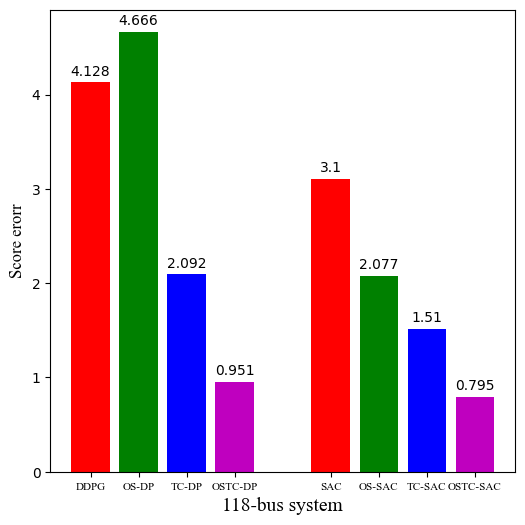

In [64]:
# plt.rcParams['font.sans-serif'] = ['SimHei']
labels = ['DDPG','OS-DP','TC-DP','OSTC-DP','SAC','OS-SAC','TC-SAC','OSTC-SAC' ]
men_means = [-a2+a0,-b1+a0,-b2+a0,-a1+a0, -a3+a0,-b3+a0,-b4+a0,-a4+a0]

x = np.arange(4)
x = np.hstack((x,x+5))*5
width = 4  # the width of the bars
fig, ax = plt.subplots(1,1,figsize=(6,6) )
rects1 = ax.bar(x, men_means,width, color=['r','g','b','m','r','g','b','m'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score erorr', fontdict={'family' : 'Times New Roman', 'size': 12})
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict={'family' : 'Times New Roman', 'size': 8})
# ax[0].legend()
ax.set_xlabel(str(env)+'-bus system', fontdict={'family' : 'Times New Roman', 'size': 14})

# autolabel(rects1)
# autolabel(rects2)
# fig.tight_layout()
autolabel(rects1)
plt.show()
# fig.savefig('error_result_'+str(env)+'_scorest.pdf', format='pdf', bbox_inches = 'tight')

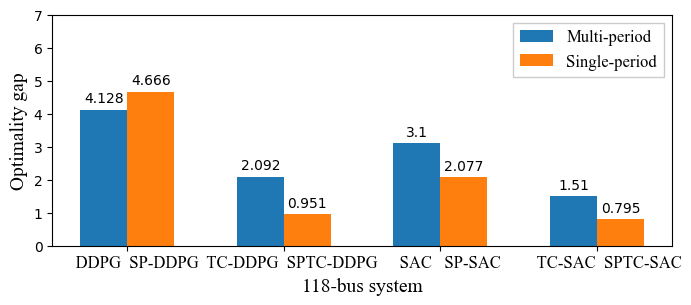

In [65]:
# plt.rcParams['font.sans-serif'] = ['SimHei']
# labels = ['DDPG','OS-DP','TC-DP','OSTC-DP','SAC','OS-SAC','TC-SAC','OSTC-SAC' ]
# labels = ['DDPG    SP-DP','TC-DP   SPTC-DP','  SAC     SP-SAC', '      TC-SAC  SPTC-SAC']
labels = ['     DDPG  SP-DDPG','    TC-DDPG  SPTC-DDPG','     SAC   SP-SAC', '      TC-SAC  SPTC-SAC']
without_os = [-a2+a0,-b2+a0, -a3+a0,-b4+a0]
add_os = [-b1+a0,-a1+a0,-b3+a0,-a4+a0]

x = np.array([1,2,3,4])*5
# x = np.hstack((x,x+6))*5
width = 1.5  # the width of the bars
fig, ax = plt.subplots(1,1,figsize=(8,3))
rects1 = ax.bar(x-width/2, without_os,width, label='Multi-period')
rects2 = ax.bar(x+width/2, add_os,width, label='Single-period')
ax.set_ylim(0,1)
if env == 118:
    ax.set_ylim(0,7)
# Add some text for labels, title and custom x-axis tick labels, etc.Reward erorr
ax.set_ylabel('Optimality gap', fontdict={'family' : 'Times New Roman', 'size': 14})
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict={'family' : 'Times New Roman', 'size': 12})
# ax[0].legend()
ax.set_xlabel(str(env)+'-bus system', fontdict={'family' : 'Times New Roman', 'size': 14})
if env == 33:
    ax.legend(bbox_to_anchor=(1, 1), loc='upper right', fancybox=False, framealpha=1.0,prop={'family' : 'Times New Roman', 'size': 12})
if env == 69:
    ax.legend(bbox_to_anchor=(1, 1), loc='upper right', fancybox=False, framealpha=1.0,prop={'family' : 'Times New Roman', 'size': 12})
if env == 118:
    ax.legend(bbox_to_anchor=(1,1), loc='upper right', fancybox=False, framealpha=1.0,prop={'family' : 'Times New Roman', 'size': 12})
# autolabel(rects1)
# autolabel(rects2)
# fig.tight_layout()
autolabel(rects1)
autolabel(rects2)
plt.show()
fig.savefig('error_result_'+str(env)+'_os.pdf', format='pdf', bbox_inches = 'tight')

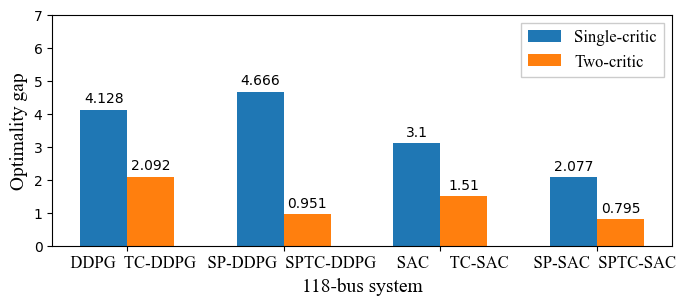

In [66]:
# plt.rcParams['font.sans-serif'] = ['SimHei']
# labels = ['DDPG','OS-DP','TC-DP','OSTC-DP','SAC','OS-SAC','TC-SAC','OSTC-SAC' ]
# labels = ['DDPG    TC-DP','   SP-DP   SPTC-DP','    SAC      TC-SAC', '    SP-SAC  SPTC-SAC']
labels = ['   DDPG  TC-DDPG','    SP-DDPG  SPTC-DDPG','      SAC     TC-SAC', '    SP-SAC  SPTC-SAC']
without_os = [-a2+a0,-b1+a0, -a3+a0,-b3+a0]
add_os = [-b2+a0,-a1+a0,-b4+a0,-a4+a0]

x = np.array([1,2,3,4])*5
# x = np.hstack((x,x+6))*5
width = 1.5  # the width of the bars
fig, ax = plt.subplots(1,1,figsize=(8,3) )
rects1 = ax.bar(x-width/2, without_os,width, label='Single-critic')
rects2 = ax.bar(x+width/2, add_os,width, label='Two-critic')

ax.set_ylim(0,1)
if env == 118:
    ax.set_ylim(0,7)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Optimality gap', fontdict={'family' : 'Times New Roman', 'size': 14})
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict={'family' : 'Times New Roman', 'size': 12})
# ax[0].legend()
ax.set_xlabel(str(env)+'-bus system', fontdict={'family' : 'Times New Roman', 'size': 14})
if env == 33:
    ax.legend(bbox_to_anchor=(1, 1), loc='upper right', fancybox=False, framealpha=1.0,prop={'family' : 'Times New Roman', 'size': 12})
if env == 69:
    ax.legend(bbox_to_anchor=(1, 1), loc='upper right', fancybox=False, framealpha=1.0,prop={'family' : 'Times New Roman', 'size': 12})
if env == 118:
    ax.legend(bbox_to_anchor=(1, 1), loc='upper right', fancybox=False, framealpha=1.0,prop={'family' : 'Times New Roman', 'size': 12})
# autolabel(rects1)
# autolabel(rects2)
# fig.tight_layout()
autolabel(rects1)
autolabel(rects2)
plt.show()
fig.savefig('error_result_'+str(env)+'_tc.pdf', format='pdf', bbox_inches = 'tight')

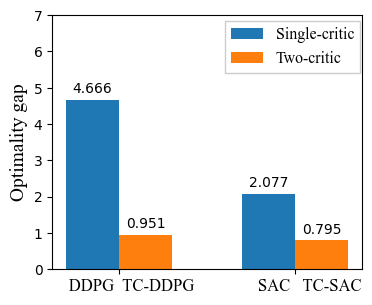

In [67]:
# plt.rcParams['font.sans-serif'] = ['SimHei']
# labels = ['DDPG','OS-DP','TC-DP','OSTC-DP','SAC','OS-SAC','TC-SAC','OSTC-SAC' ]
# labels = ['  DDPG     SPTC-DP',  '       SAC   SPTC-SAC']
labels = ['      DDPG  TC-DDPG',  '       SAC   TC-SAC']
without_ostc = [-b1+a0,-b3+a0]
add_ostc = [-a1+a0,-a4+a0]

x = np.array([1,2])*5
# x = np.hstack((x,x+6))*5
width = 1.5  # the width of the bars
fig, ax = plt.subplots(1,1,figsize=(4,3.3) )
# rects1 = ax.bar(x-width/2, without_ostc,width, label= 'Without single-period two-critic')
# rects2 = ax.bar(x+width/2, add_ostc,width, label= 'Adding single-period two-critic')

rects1 = ax.bar(x-width/2, without_ostc,width, label= 'Single-critic')
rects2 = ax.bar(x+width/2, add_ostc,width, label= 'Two-critic')

ax.set_ylim(0,1)
if env == 118:
    ax.set_ylim(0,7)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Optimality gap', fontdict={'family' : 'Times New Roman', 'size': 14})
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict={'family' : 'Times New Roman', 'size': 12})
# ax[0].legend()
# ax.set_xlabel(str(env)+'-bus system', fontdict={'family' : 'Times New Roman', 'size': 14})
if env == 33:
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper right', fancybox=False, framealpha=1.0,prop={'family' : 'Times New Roman', 'size': 11.4})
if env == 69:
    ax.legend(bbox_to_anchor=(1.02, 1.01), loc='upper right', fancybox=False, framealpha=1.0,prop={'family' : 'Times New Roman', 'size': 11.4})
if env == 118:
    ax.legend(bbox_to_anchor=(1.02, 1.01), loc='upper right', fancybox=False, framealpha=1.0,prop={'family' : 'Times New Roman', 'size': 11.4})
# autolabel(rects1)
# autolabel(rects2)
# fig.tight_layout()
autolabel(rects1)
autolabel(rects2)
plt.show()
fig.savefig('error_result_'+str(env)+'_ostc.pdf', format='pdf', bbox_inches = 'tight')

In [68]:
a1 = traintest_two_objective.grid_loss_sum_st.mean(1)[250:].mean()
a2 = traintest_long.grid_loss_sum_st.mean(1)[250:].mean()
a3 = traintest_sac.grid_loss_sum_st.mean(1)[250:].mean()
a4 = traintest_sactootsa.grid_loss_sum_st.mean(1)[250:].mean()
a0 = train_vvo.grid_loss_sum_s[250:].mean()
print(a1,a2,a3,a4,a0)
b1 = traintest_short.grid_loss_sum_st[250:].mean().mean()
b2 = traintest_long_two_objective.grid_loss_sum_st[250:].mean().mean()
b3 = traintest_sac_short.grid_loss_sum_st[250:].mean().mean()
b4 = traintest_sac_two_objective.grid_loss_sum_st[250:].mean().mean()
print(a2,b1,b2,a1)
data[str(env)+'-bus-pl'] = [-a0,-a2,-b1,-b2,-a1,-a3,-b3,-b4,-a4]
data

-15.43413298441838 -18.726119040833723 -17.57573313652798 -15.295662142016655 -14.702262684568925
-18.726119040833723 -19.116135679635416 -16.54137762197588 -15.43413298441838


,Algorithm,33-bus-r,69-bus-r,118-bus-r,33-bus-pl,69-bus-pl,118-bus-pl,33-bus-v,69-bus-v,118-bus-v
0,MBO,-4.199,-3.355,-14.702,4.199,3.355,14.702,0.000e+00,0.000e+00,NaN
1,DDPG,-4.825,-4.031,-18.830,4.825,3.962,18.726,6.877e-06,1.379e-03,NaN
2,SP-DP,-4.832,-4.092,-19.368,4.831,4.006,19.116,2.502e-05,1.717e-03,NaN
3,TC-DP,-4.287,-3.476,-16.794,4.286,3.402,16.541,2.864e-05,1.469e-03,NaN
4,SPTC-DP,-4.272,-3.440,-15.653,4.272,3.385,15.434,4.547e-06,1.099e-03,NaN
5,SAC,-4.598,-3.733,-17.803,4.574,3.703,17.576,4.814e-04,6.191e-04,NaN
6,SP-SAC,-4.369,-3.625,-16.779,4.363,3.548,16.662,1.237e-04,1.527e-03,NaN
7,TC-SAC,-4.423,-3.547,-16.212,4.423,3.496,15.876,0.000e+00,1.010e-03,NaN
8,SPTC-SAC,-4.277,-3.455,-15.497,4.269,3.406,15.296,1.774e-04,9.751e-04,NaN


In [69]:
b4

-15.87613473287014

In [70]:
a1 = (traintest_two_objective.violation_sum_M_st.mean(1)+traintest_two_objective.violation_sum_N_st.mean(1))[250:].mean()
a2 = (traintest_long.violation_sum_M_st.mean(1)+traintest_long.violation_sum_N_st.mean(1))[250:].mean()
a3 = (traintest_sac.violation_sum_M_st.mean(1)+traintest_sac.violation_sum_N_st.mean(1))[250:].mean()
a4 = (traintest_sactootsa.violation_sum_M_st.mean(1)+traintest_sactootsa.violation_sum_N_st.mean(1))[250:].mean()
a0 = 0
print(a1,a2,a3,a4,a0)
b1 = (traintest_short.violation_sum_M_st.mean(1)+traintest_short.violation_sum_N_st.mean(1))[250:].mean()
b2 = (traintest_long_two_objective.violation_sum_M_st.mean(1)+traintest_long_two_objective.violation_sum_N_st.mean(1))[250:].mean()
b3 = (traintest_sac_short.violation_sum_M_st.mean(1)+traintest_sac_short.violation_sum_N_st.mean(1))[250:].mean()
b4 = (traintest_sac_two_objective.violation_sum_M_st.mean(1)+traintest_sac_two_objective.violation_sum_N_st.mean(1))[250:].mean()
print(a2,b1,b2,a1)
data[str(env)+'-bus-v'] = [a0,a2,b1,b2,a1,a3,b3,b4,a4]
data

0.0043851787266329404 0.0020797195510060505 0.004536445326629309 0.004030614967660887 0
0.0020797195510060505 0.005039223804694064 0.005050978835541107 0.0043851787266329404


,Algorithm,33-bus-r,69-bus-r,118-bus-r,33-bus-pl,69-bus-pl,118-bus-pl,33-bus-v,69-bus-v,118-bus-v
0,MBO,-4.199,-3.355,-14.702,4.199,3.355,14.702,0.000e+00,0.000e+00,0.000e+00
1,DDPG,-4.825,-4.031,-18.830,4.825,3.962,18.726,6.877e-06,1.379e-03,2.080e-03
2,SP-DP,-4.832,-4.092,-19.368,4.831,4.006,19.116,2.502e-05,1.717e-03,5.039e-03
3,TC-DP,-4.287,-3.476,-16.794,4.286,3.402,16.541,2.864e-05,1.469e-03,5.051e-03
4,SPTC-DP,-4.272,-3.440,-15.653,4.272,3.385,15.434,4.547e-06,1.099e-03,4.385e-03
5,SAC,-4.598,-3.733,-17.803,4.574,3.703,17.576,4.814e-04,6.191e-04,4.536e-03
6,SP-SAC,-4.369,-3.625,-16.779,4.363,3.548,16.662,1.237e-04,1.527e-03,2.348e-03
7,TC-SAC,-4.423,-3.547,-16.212,4.423,3.496,15.876,0.000e+00,1.010e-03,6.717e-03
8,SPTC-SAC,-4.277,-3.455,-15.497,4.269,3.406,15.296,1.774e-04,9.751e-04,4.031e-03


In [71]:
data

,Algorithm,33-bus-r,69-bus-r,118-bus-r,33-bus-pl,69-bus-pl,118-bus-pl,33-bus-v,69-bus-v,118-bus-v
0,MBO,-4.199,-3.355,-14.702,4.199,3.355,14.702,0.000e+00,0.000e+00,0.000e+00
1,DDPG,-4.825,-4.031,-18.830,4.825,3.962,18.726,6.877e-06,1.379e-03,2.080e-03
2,SP-DP,-4.832,-4.092,-19.368,4.831,4.006,19.116,2.502e-05,1.717e-03,5.039e-03
3,TC-DP,-4.287,-3.476,-16.794,4.286,3.402,16.541,2.864e-05,1.469e-03,5.051e-03
4,SPTC-DP,-4.272,-3.440,-15.653,4.272,3.385,15.434,4.547e-06,1.099e-03,4.385e-03
5,SAC,-4.598,-3.733,-17.803,4.574,3.703,17.576,4.814e-04,6.191e-04,4.536e-03
6,SP-SAC,-4.369,-3.625,-16.779,4.363,3.548,16.662,1.237e-04,1.527e-03,2.348e-03
7,TC-SAC,-4.423,-3.547,-16.212,4.423,3.496,15.876,0.000e+00,1.010e-03,6.717e-03
8,SPTC-SAC,-4.277,-3.455,-15.497,4.269,3.406,15.296,1.774e-04,9.751e-04,4.031e-03


In [72]:
data.to_csv('data_50.csv')